In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
class MLR():
    def __init__(self):
        self.theta = None
        
        self.history = {
            'loss': []
        }
        
    # predict the output using the current parameters
    def predict(self, X, expand=True):
        if expand:
            b = np.ones(X.shape[0])
            X = np.c_[b, X]
        return np.sum(X * self.theta, axis=1)
    
    # calculate the loss
    def squared_error(self, y_, y, m):
        return np.sum(np.square(y_ - y)) / m
    
    def fit (self, X, y, alpha=0.1, epoch=100):
        # get the shape of the data
        m, n = X.shape
        self.theta = np.zeros((n + 1, ))
    
        # add an extra feature for bias 
        b = np.ones(m)
        X = np.c_[b, X]
        # start the training
        for i in xrange(epoch):
            # get the predicted value on current parameters
            y_ = self.predict(X, False)
            # get the loss
            loss = self.squared_error(y_, y, m)
            self.history['loss'].append(loss)
            
            # update the weights
            update_theta = np.zeros_like(self.theta)
            for j in xrange(n):
                update_theta[j] = np.sum(np.multiply((y_ - y), X[:, j])) / m
            self.theta -= alpha * update_theta
        print 'loss =', loss


In [5]:
X = np.random.random((100, 5)) 
y = np.sum(np.random.randint(100, size = (5, )) * X, axis=1)

In [6]:
clf = MLR()

In [7]:
clf.fit(X, y, epoch=200)

loss = 46.6279387547


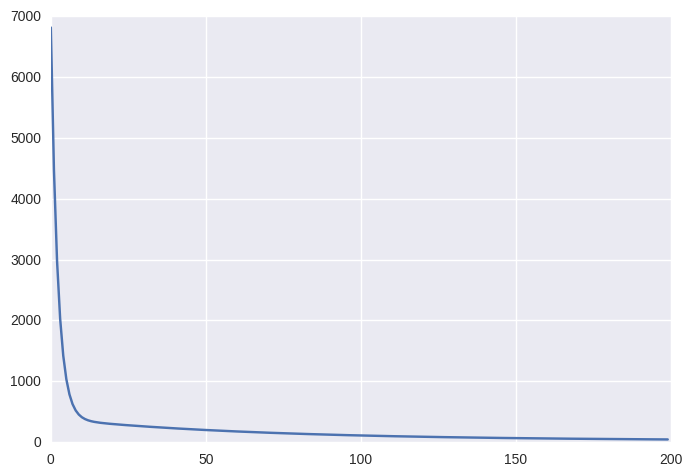

In [8]:
loss = clf.history['loss']
plt.plot([i for i in xrange(200)], loss)
plt.show()